# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
file=pd.read_csv("C:/Users/Sinegalatha/Desktop/Imarticus Learning/0.MKCE/Datasets/Raisin_Dataset.csv")
df=pd.DataFrame(file)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838694,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


# general info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [3]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


# there is no null values

In [4]:
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

# there is no duplicates

In [5]:
df[df.duplicated()]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


In [6]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [7]:
set(df['Class'])

{0, 1}

# correlation

In [8]:
df.corr().style.background_gradient(cmap='coolwarm')

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


# checking for outliers using boxplot

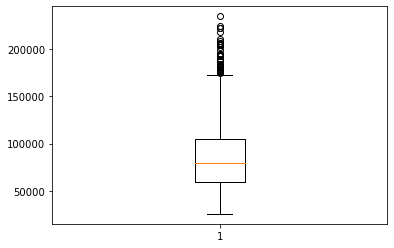

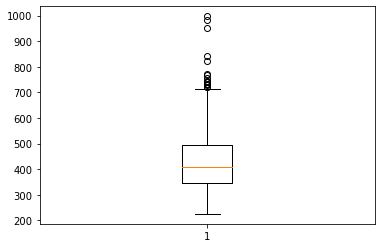

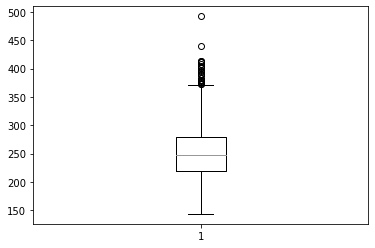

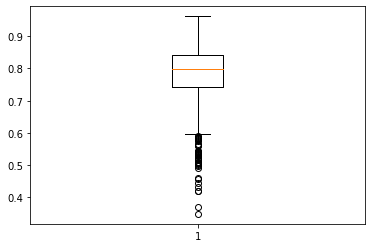

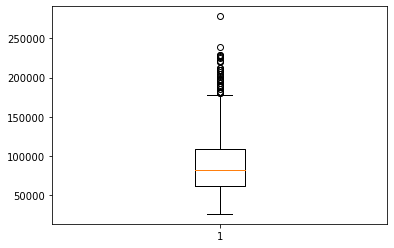

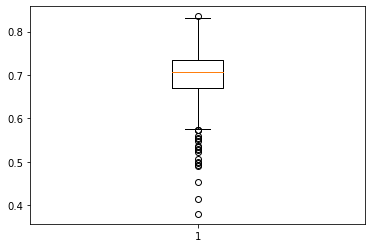

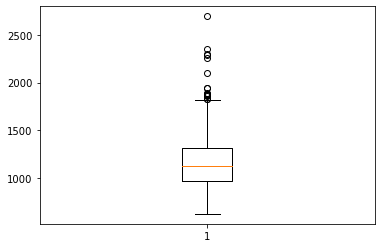

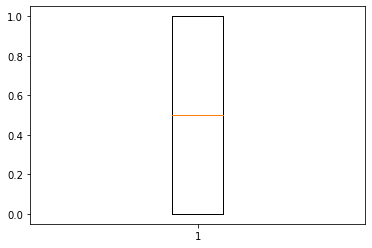

In [9]:
import matplotlib.pyplot as mtp
for i in df:
    mtp.boxplot(df[i])
    mtp.show()

# removing outliers using capping and flooring

In [10]:
for i in df:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    df[i]=np.where(df[i]>upper,upper,df[i])
    df[i]=np.where(df[i]<lower,lower,df[i])

# after removing outliers , verifying

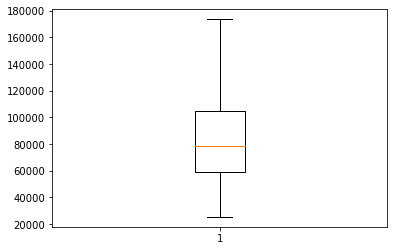

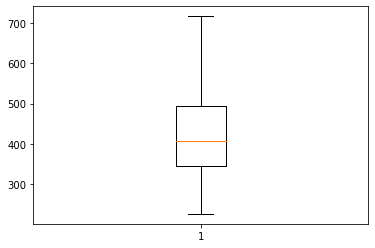

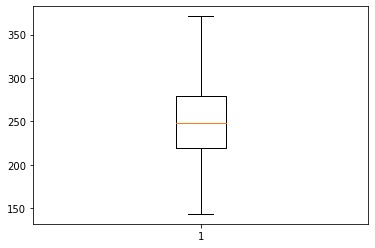

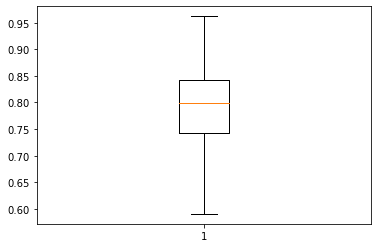

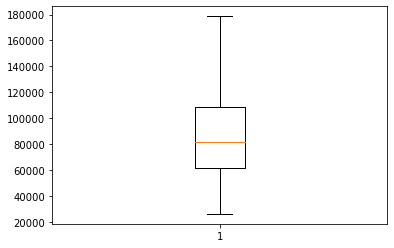

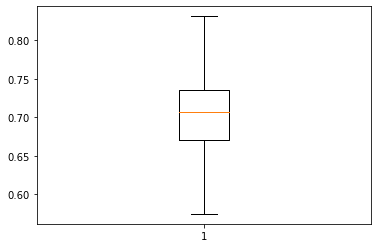

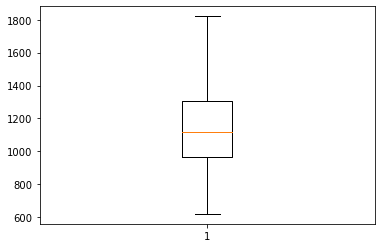

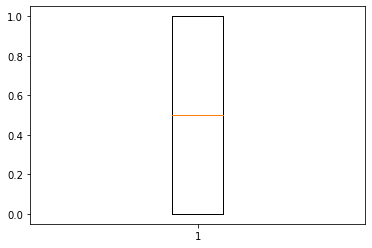

In [11]:
import matplotlib.pyplot as mtp
for i in df:
    mtp.boxplot(df[i])
    mtp.show()

# after removing outliers, finding correlation

In [12]:
df.corr().style.background_gradient(cmap='coolwarm')

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.947609,0.906408,0.370341,0.998895,0.012408,0.978590,-0.644222
MajorAxisLength,0.947609,1.000000,0.749917,0.615306,0.951927,-0.127807,0.978822,-0.692021
MinorAxisLength,0.906408,0.749917,1.000000,-0.006465,0.902568,0.164214,0.850168,-0.510563
Eccentricity,0.370341,0.615306,-0.006465,1.000000,0.379727,-0.366027,0.474263,-0.459646
ConvexArea,0.998895,0.951927,0.902568,0.379727,1.000000,-0.002290,0.983378,-0.651205
Extent,0.012408,-0.127807,0.164214,-0.366027,-0.002290,1.000000,-0.090002,0.149804
Perimeter,0.978590,0.978822,0.850168,0.474263,0.983378,-0.090002,1.000000,-0.691853
Class,-0.644222,-0.692021,-0.510563,-0.459646,-0.651205,0.149804,-0.691853,1.000000


## after removing outiers, I found that the correlation between the target and independent columns are considerably increased

# to view the graphical view of relationships between columns

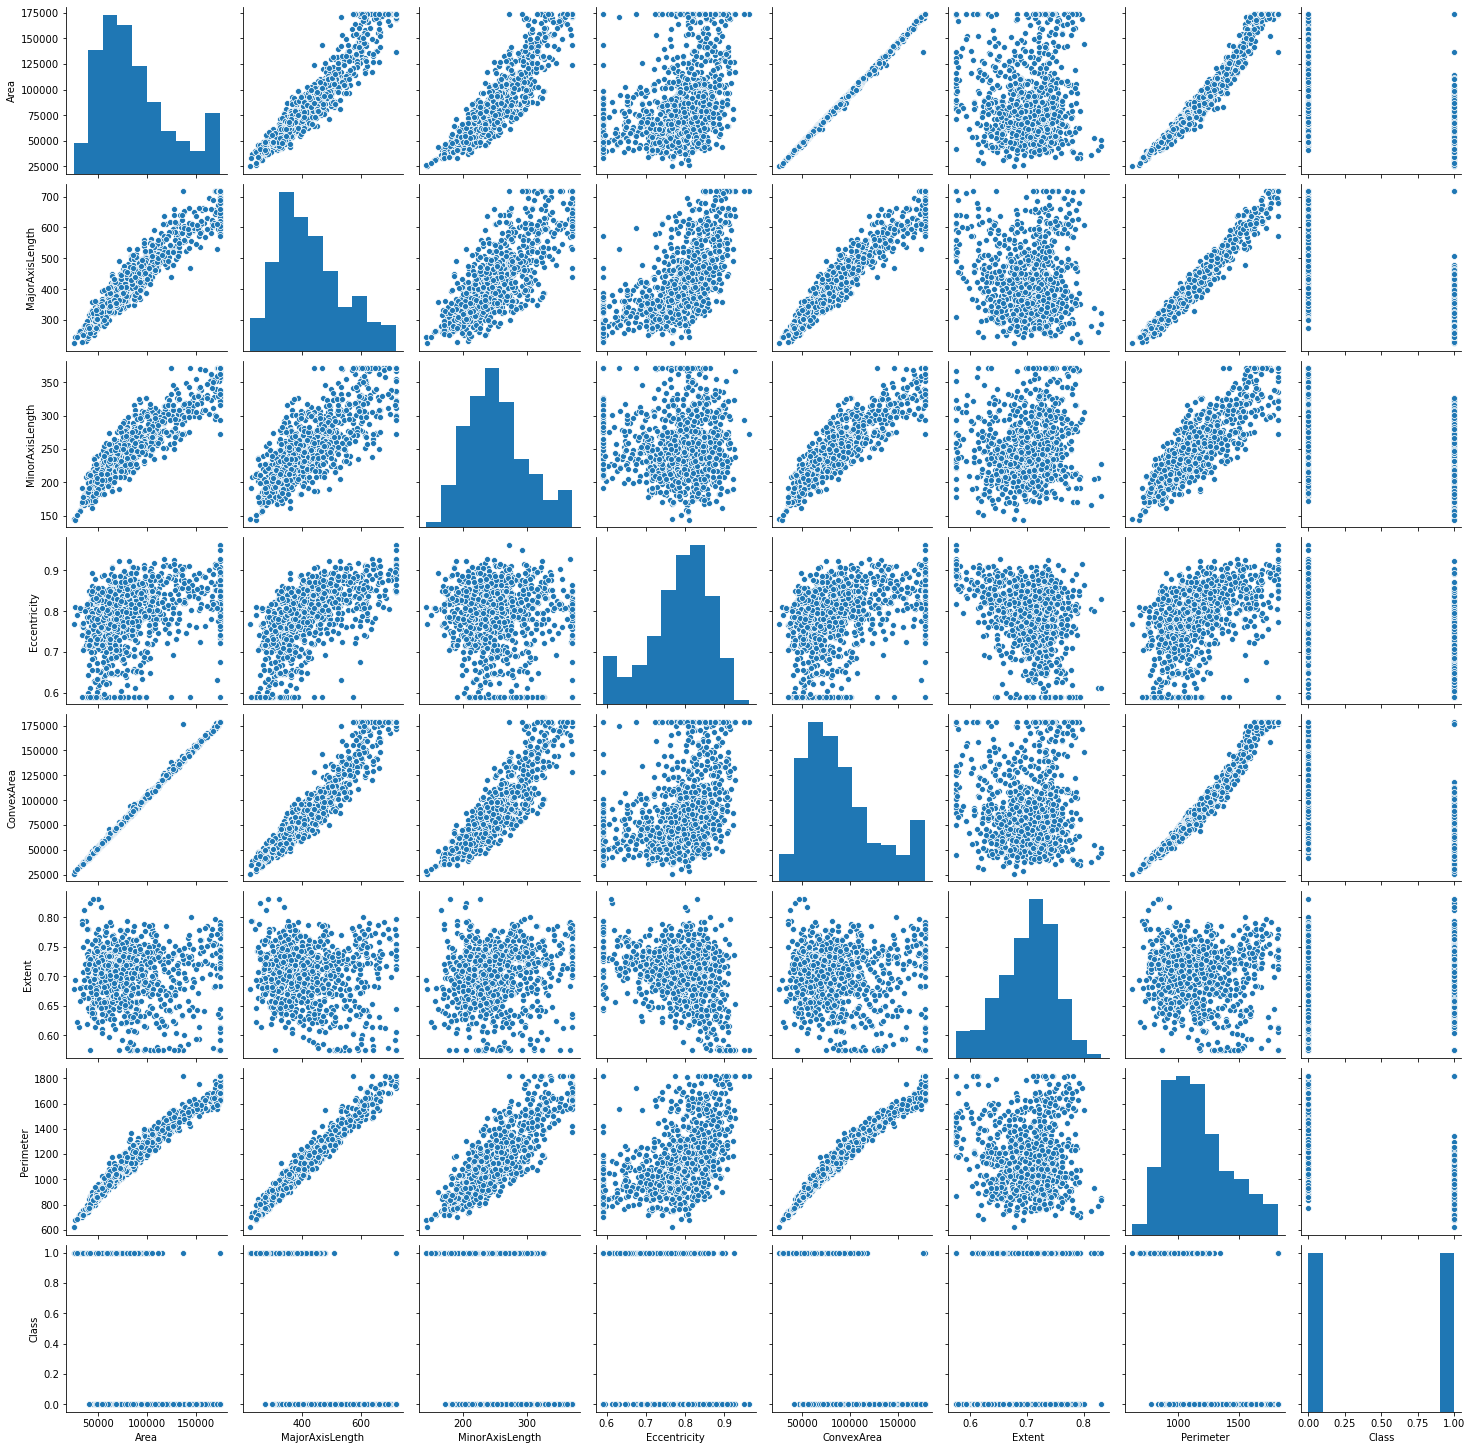

In [13]:
import seaborn as sns
sns.pairplot(df)

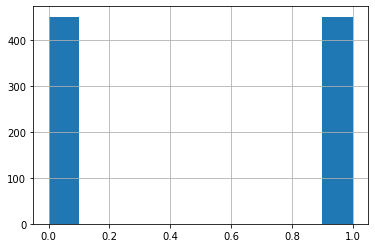

In [14]:
df['Class'].hist()

In [15]:
x=df.iloc[:,:-1]
print('x')
print(x)
y=df.iloc[:,-1]
print('y')
print(y)

x
        Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524.0       442.246011       253.291155      0.819738     90546.0   
1    75166.0       406.690687       243.032436      0.801805     78789.0   
2    90856.0       442.267048       266.328318      0.798354     93717.0   
3    45928.0       286.540559       208.760042      0.684989     47336.0   
4    79408.0       352.190770       290.827533      0.590559     81463.0   
..       ...              ...              ...           ...         ...   
895  83248.0       430.077308       247.838694      0.817263     85839.0   
896  87350.0       440.735698       259.293149      0.808629     90899.0   
897  99657.0       431.706981       298.837323      0.721684    106264.0   
898  93523.0       476.344094       254.176054      0.845739     97653.0   
899  85609.0       512.081774       215.271976      0.907345     89197.0   

       Extent  Perimeter  
0    0.758651   1184.040  
1    0.684130   1121.786  
2   

# importing standard scaler for scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)


# train_test_splitting

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# train the model

In [18]:
accuracy=[]
algorithms=[]

# DECISIONTREE CLASSIFIER

In [19]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
decision_pred=decision.predict(x_test)

# performance analysis

In [21]:
algorithms.append('DecisionTreeClassifier')
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
print('confusion_matrix')
print(confusion_matrix(y_test,decision_pred))
print('accuracy_score')
print(accuracy_score(y_test,decision_pred))
accuracy.append(accuracy_score(y_test,decision_pred))
print('Classification Report')
print(classification_report(y_test,decision_pred))
bagging_score =roc_auc_score(y_test, decision_pred)
print(bagging_score)

confusion_matrix
[[112  32]
 [ 40 113]]
accuracy_score
0.7575757575757576
Classification Report
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       144
         1.0       0.78      0.74      0.76       153

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

0.7581699346405228


# LINEARDISCRIMINANTANALYSIS

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()
LDA.fit(x_train,y_train)


LinearDiscriminantAnalysis()

In [23]:
lda_predict=LDA.predict(x_test)

In [24]:
algorithms.append('LINEARDISCRIMINANTANALYSIS')
print('confusion_matrix')
print(confusion_matrix(y_test,lda_predict))
print('accuracy_score')
print(accuracy_score(y_test,lda_predict))
accuracy.append(accuracy_score(y_test,lda_predict))
print('Classification Report')
print(classification_report(y_test,lda_predict))
bagging_score =roc_auc_score(y_test, lda_predict)
print(bagging_score)

confusion_matrix
[[125  19]
 [ 19 134]]
accuracy_score
0.8720538720538721
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       144
         1.0       0.88      0.88      0.88       153

    accuracy                           0.87       297
   macro avg       0.87      0.87      0.87       297
weighted avg       0.87      0.87      0.87       297

0.8719362745098039


# LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)


LogisticRegression()

In [26]:
regressor_predict=regressor.predict(x_test)

In [27]:
algorithms.append('LogisticRegression')
print('confusion_matrix')
print(confusion_matrix(y_test,regressor_predict))
print('accuracy_score')
print(accuracy_score(y_test,regressor_predict))
accuracy.append(accuracy_score(y_test,regressor_predict))
print('Classification Report')
print(classification_report(y_test,regressor_predict))
bagging_score =roc_auc_score(y_test, regressor_predict)
print(bagging_score)

confusion_matrix
[[126  18]
 [ 24 129]]
accuracy_score
0.8585858585858586
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       144
         1.0       0.88      0.84      0.86       153

    accuracy                           0.86       297
   macro avg       0.86      0.86      0.86       297
weighted avg       0.86      0.86      0.86       297

0.8590686274509804


# BAGGING CLASSIFIER

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag=BaggingClassifier(DecisionTreeClassifier(random_state=0))
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))

In [29]:
bad_pred=bag.predict(x_test)

In [30]:
algorithms.append('BaggingClassifier')
print('confusion_matrix')
print(confusion_matrix(y_test,bad_pred))
print('accuracy_score')
print(accuracy_score(y_test,bad_pred))
accuracy.append(accuracy_score(y_test,bad_pred))
print('Classification Report')
print(classification_report(y_test,bad_pred))
print('bagging score')
bagging_score =roc_auc_score(y_test, bad_pred)
print(bagging_score)

confusion_matrix
[[128  16]
 [ 33 120]]
accuracy_score
0.835016835016835
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       144
         1.0       0.88      0.78      0.83       153

    accuracy                           0.84       297
   macro avg       0.84      0.84      0.83       297
weighted avg       0.84      0.84      0.83       297

bagging score
0.8366013071895424


# ADABOOST CLASSIFIER

In [31]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(random_state=0)

In [32]:
ada_pred=adaboost.predict(x_test)

In [33]:
algorithms.append('ADABOOST')
print('confusion_matrix')
print(confusion_matrix(y_test,ada_pred))
print('accuracy_score')
print(accuracy_score(y_test,ada_pred))
accuracy.append(accuracy_score(y_test,ada_pred))
print('Classification Report')
print(classification_report(y_test,ada_pred))
print('bagging score')
bagging_score =roc_auc_score(y_test, ada_pred)
print(bagging_score)

confusion_matrix
[[117  27]
 [ 20 133]]
accuracy_score
0.8417508417508418
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       144
         1.0       0.83      0.87      0.85       153

    accuracy                           0.84       297
   macro avg       0.84      0.84      0.84       297
weighted avg       0.84      0.84      0.84       297

bagging score
0.840890522875817


# svc classifier

In [34]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [35]:
svc_pred=svc.predict(x_test)

In [36]:

algorithms.append('SVC')
print('confusion_matrix')
print(confusion_matrix(y_test,svc_pred))
print('accuracy_score')
print(accuracy_score(y_test,svc_pred))
print('Classification Report')
print(classification_report(y_test,svc_pred))
accuracy.append(accuracy_score(y_test,svc_pred))
print('bagging score')
bagging_score =roc_auc_score(y_test, svc_pred)
print(bagging_score)

confusion_matrix
[[118  26]
 [ 16 137]]
accuracy_score
0.8585858585858586
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       144
         1.0       0.84      0.90      0.87       153

    accuracy                           0.86       297
   macro avg       0.86      0.86      0.86       297
weighted avg       0.86      0.86      0.86       297

bagging score
0.8574346405228758


# COMARISON OF ALGORITHMS

In [37]:
print(accuracy)
print(algorithms)

[0.7575757575757576, 0.8720538720538721, 0.8585858585858586, 0.835016835016835, 0.8417508417508418, 0.8585858585858586]
['DecisionTreeClassifier', 'LINEARDISCRIMINANTANALYSIS', 'LogisticRegression', 'BaggingClassifier', 'ADABOOST', 'SVC']


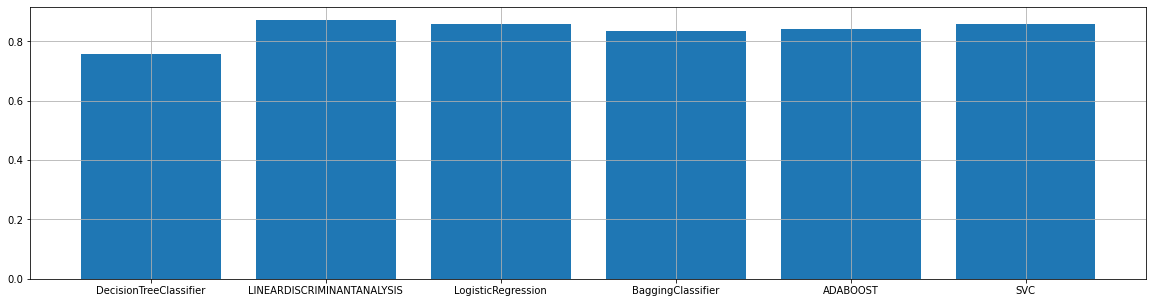

In [38]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,5
mtp.bar(algorithms,accuracy)
mtp.grid()

# Comparing all algorithms, LDA(LINEAR DISCRIMINANT ANALYSIS ) have produced high accuracy of 0.8720538720538721.